<a href="https://colab.research.google.com/github/ashleymuoki/Team-ON78-ibmz-datathon/blob/main/Copy_of_Renewable_energy_datathon_IBNM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing required libraries with pyforest
!pip install --quiet pyforest

  Preparing metadata (setup.py) ... done


In [ ]:
import pyforest

In [ ]:
#upload from the laptop
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rs = pd.read_csv('/content/drive/MyDrive/IBM datathon 2023/solar-measurements_kenya-narok_world-bank_year1_qc.csv')
rs.head()


<ipython-input-9-0b4a9a5cf1a2>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  rs = pd.read_csv('/content/drive/MyDrive/IBM datathon 2023/solar-measurements_kenya-narok_world-bank_year1_qc.csv')


,time,dhi_pyr,ghi_pyr_1,ghi_pyr_2,air_temperature,relative_humidity,barometric_pressure,precipitation,wind_speed,wind_from_direction,gti_clean,gti_soil,gti_monthly,sensor_cleaning,comments
0,04/12/2019 00:01,0.0,0.0,0.0,15.598166,97.782997,811.291992,0.0,1.251317,243.790543,0.0,0.0,0.0,0.0,NaN
1,04/12/2019 00:02,0.0,0.0,0.0,15.573500,97.705002,811.211609,0.0,1.101517,243.470978,0.0,0.0,0.0,0.0,NaN
2,04/12/2019 00:03,0.0,0.0,0.0,15.566666,97.707001,811.216919,0.0,0.602717,231.842773,0.0,0.0,0.0,0.0,NaN
3,04/12/2019 00:04,0.0,0.0,0.0,15.556666,97.619003,811.210022,0.0,1.107400,252.289948,0.0,0.0,0.0,0.0,NaN
4,04/12/2019 00:05,0.0,0.0,0.0,15.532499,97.594002,811.212647,0.0,0.540367,231.998215,0.0,0.0,0.0,0.0,NaN


Irradiance - the amount of light or other radiant energy striking a given area of a surface; illumination

In [ ]:
rs.tail()

,time,dhi_pyr,ghi_pyr_1,ghi_pyr_2,air_temperature,relative_humidity,barometric_pressure,precipitation,wind_speed,wind_from_direction,gti_clean,gti_soil,gti_monthly,sensor_cleaning,comments
567355,31/12/2020 23:56,0.0,0.0,0.0,14.398666,99.064003,812.351807,0.0,0.020783,218.768341,0.0,0.0,0.0,0.0,NaN
567356,31/12/2020 23:57,0.0,0.0,0.0,14.421999,99.078003,812.374329,0.0,0.228617,218.766998,0.0,0.0,0.0,0.0,NaN
567357,31/12/2020 23:58,0.0,0.0,0.0,14.436999,99.073998,812.387512,0.0,0.290967,218.765732,0.0,0.0,0.0,0.0,NaN
567358,31/12/2020 23:59,0.0,0.0,0.0,14.438666,99.078003,812.386719,0.2,0.644283,218.766892,0.0,0.0,0.0,0.0,NaN
567359,01/01/2021 00:00,0.0,0.0,0.0,14.443666,99.082001,812.393921,0.0,0.207833,218.767380,0.0,0.0,0.0,0.0,NaN


In [ ]:
rs = rs.drop('comments', axis = 1)

In [ ]:
rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567360 entries, 0 to 567359
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 567360 non-null  object 
 1   dhi_pyr              554815 non-null  float64
 2   ghi_pyr_1            554807 non-null  float64
 3   ghi_pyr_2            554815 non-null  float64
 4   air_temperature      554793 non-null  float64
 5   relative_humidity    554808 non-null  float64
 6   barometric_pressure  554787 non-null  float64
 7   precipitation        554815 non-null  float64
 8   wind_speed           497225 non-null  float64
 9   wind_from_direction  478079 non-null  float64
 10  gti_clean            554815 non-null  float64
 11  gti_soil             554815 non-null  float64
 12  gti_monthly          554815 non-null  float64
 13  sensor_cleaning      554815 non-null  float64
dtypes: float64(13), object(1)
memory usage: 60.6+ MB


In [ ]:
rs.dtypes

time                    object
dhi_pyr                float64
ghi_pyr_1              float64
ghi_pyr_2              float64
air_temperature        float64
relative_humidity      float64
barometric_pressure    float64
precipitation          float64
wind_speed             float64
wind_from_direction    float64
gti_clean              float64
gti_soil               float64
gti_monthly            float64
sensor_cleaning        float64
dtype: object

In [ ]:
rs.isna().sum()

time                       0
dhi_pyr                12545
ghi_pyr_1              12553
ghi_pyr_2              12545
air_temperature        12567
relative_humidity      12552
barometric_pressure    12573
precipitation          12545
wind_speed             70135
wind_from_direction    89281
gti_clean              12545
gti_soil               12545
gti_monthly            12545
sensor_cleaning        12545
dtype: int64

In [ ]:
rs['wind_speed'].fillna(value = rs.wind_speed.mean(), inplace = True)
rs['precipitation'].fillna(value = rs.precipitation.mean(),inplace = True)
rs['dhi_pyr'].fillna(value = rs.dhi_pyr.mean(),inplace = True)
rs['ghi_pyr_1'].fillna(value = rs.ghi_pyr_1.mean(),inplace = True)
rs['ghi_pyr_2'].fillna(value = rs.ghi_pyr_2.mean(),inplace = True)
rs['air_temperature'].fillna(value = rs.air_temperature.mean(),inplace = True)
rs['relative_humidity'].fillna(value = rs.relative_humidity.mean(),inplace = True)
rs['barometric_pressure'].fillna(value = rs.barometric_pressure.mean(),inplace = True)
rs['gti_clean'].fillna(value = rs.gti_clean.mean(),inplace = True)
rs['gti_soil'].fillna(value = rs.gti_soil.mean(),inplace = True)
rs['gti_monthly'].fillna(value = rs.gti_monthly.mean(),inplace = True)
rs['sensor_cleaning'].fillna(value = rs.sensor_cleaning.mean(),inplace = True)
rs['wind_from_direction'].fillna(value = rs.wind_from_direction.mean(),inplace = True)

In [ ]:
rs['time'] = pd.to_datetime(rs['time'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

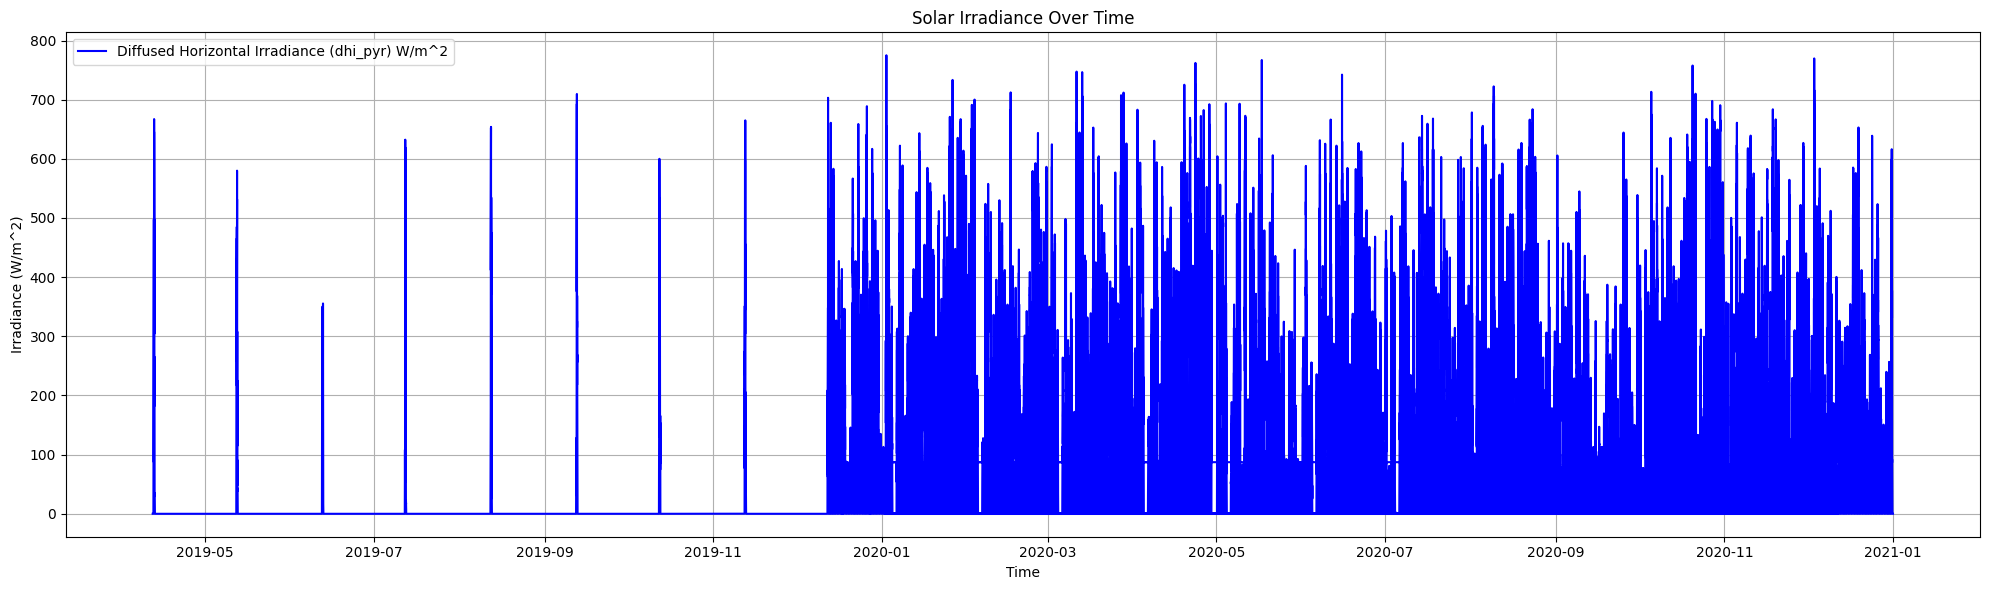

In [ ]:
#line plot
plt.figure(figsize=(20, 6))
plt.plot(rs['time'], rs['dhi_pyr'], label='Diffused Horizontal Irradiance (dhi_pyr) W/m^2', color='blue')
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m^2)')
plt.title('Solar Irradiance Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

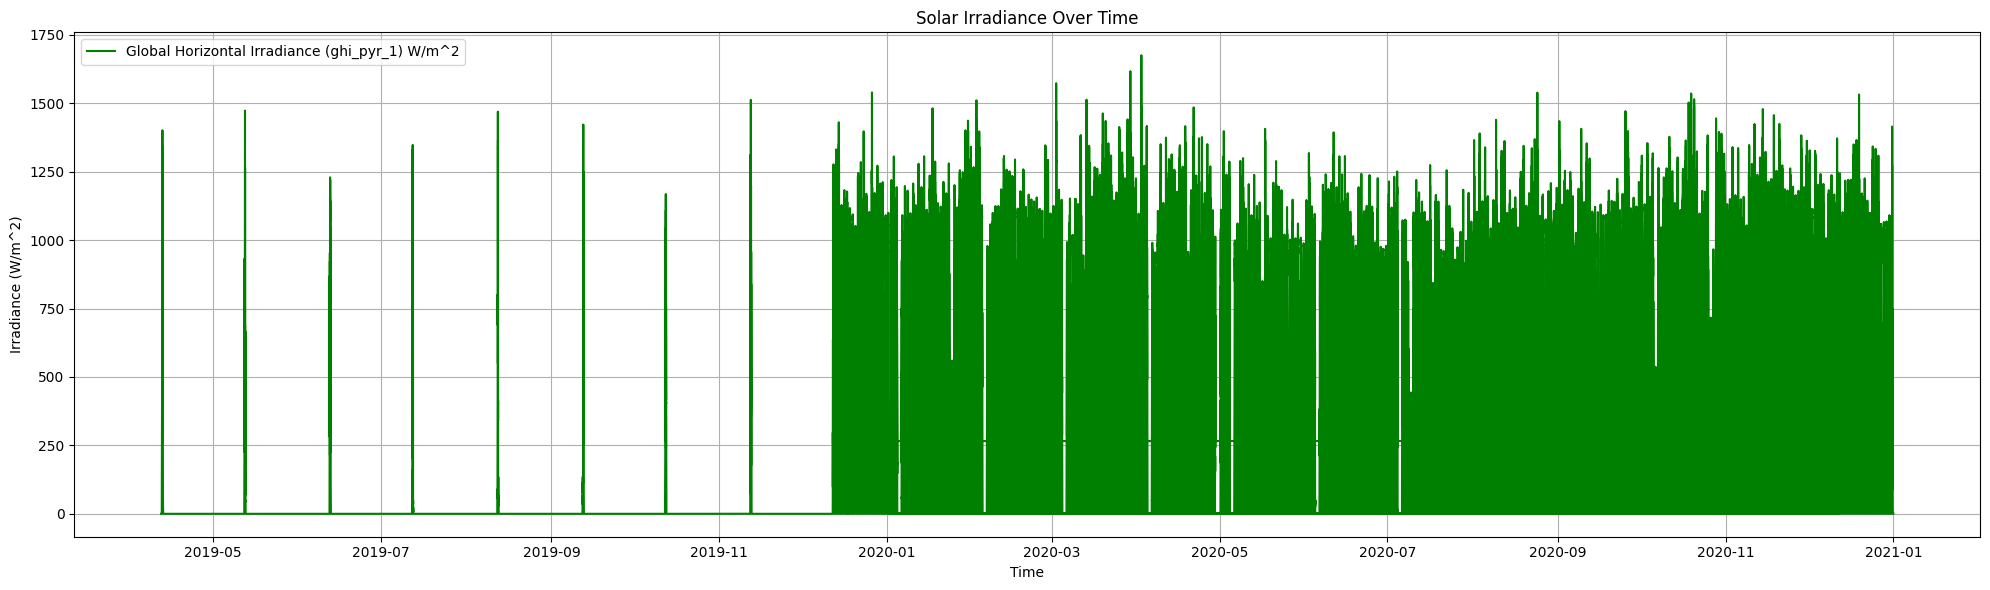

In [ ]:
#line plot
plt.figure(figsize=(20, 6))
plt.plot(rs['time'], rs['ghi_pyr_1'], label='Global Horizontal Irradiance (ghi_pyr_1) W/m^2', color='green')
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m^2)')
plt.title('Solar Irradiance Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

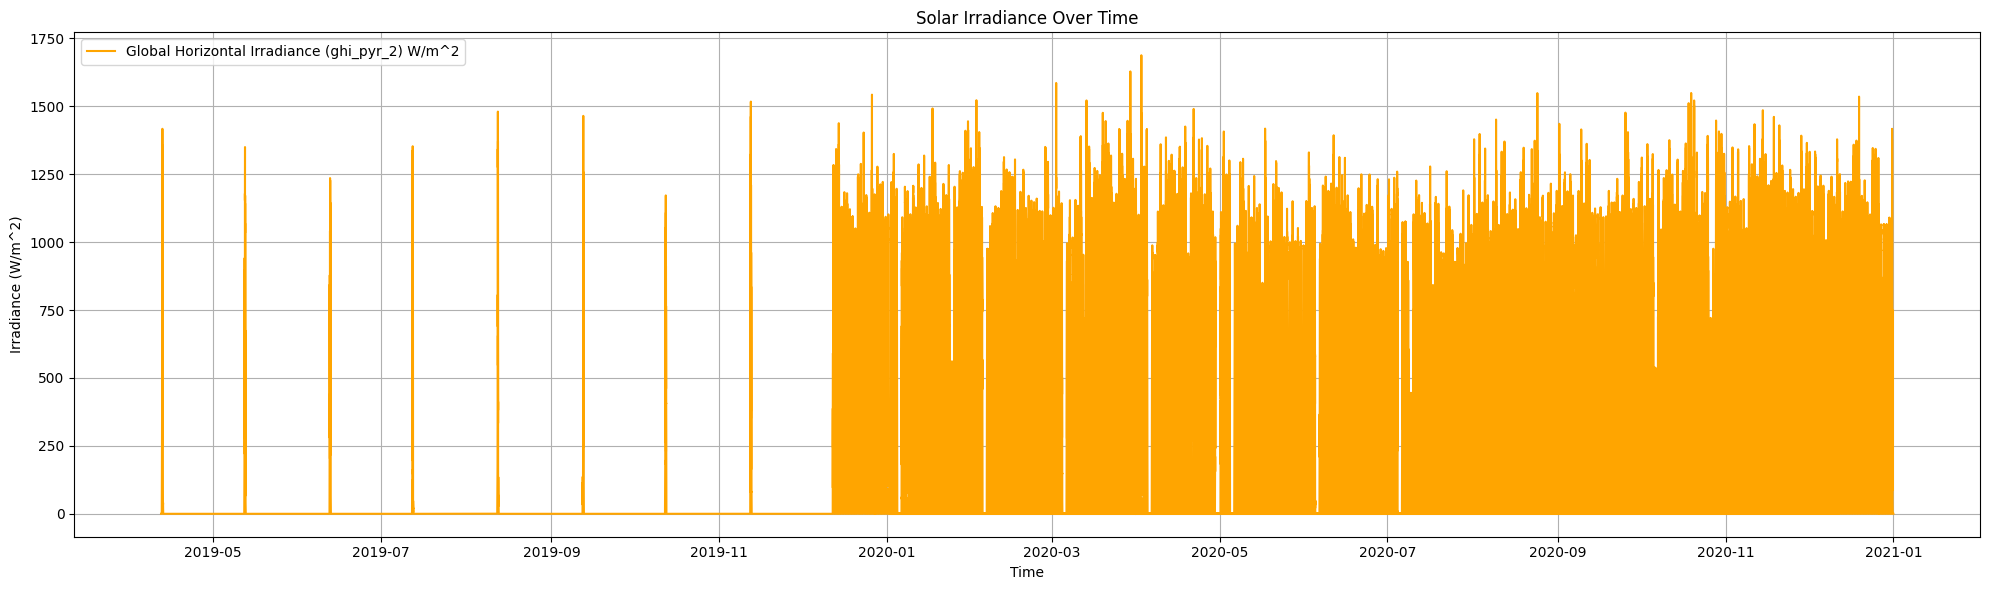

In [ ]:
#line plot
plt.figure(figsize=(20, 6))
plt.plot(rs['time'], rs['ghi_pyr_2'], label='Global Horizontal Irradiance (ghi_pyr_2) W/m^2', color='orange')
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m^2)')
plt.title('Solar Irradiance Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

<IPython.core.display.Javascript object>

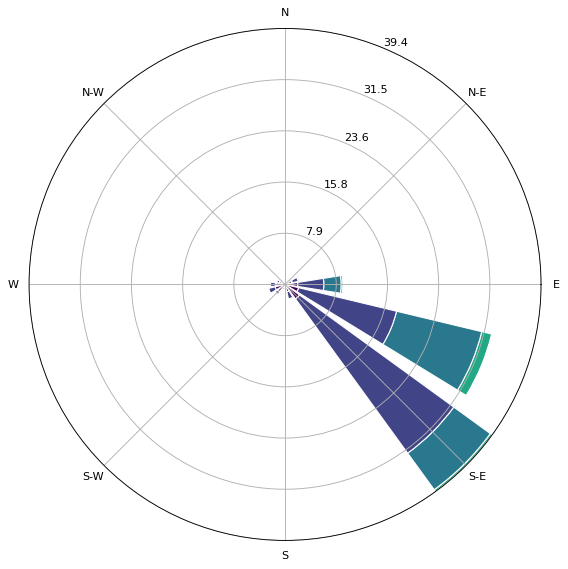

In [ ]:
! pip install --quiet windrose
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(rs["wind_from_direction"],rs['wind_speed'], normed=True, opening=0.8, edgecolor='white')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

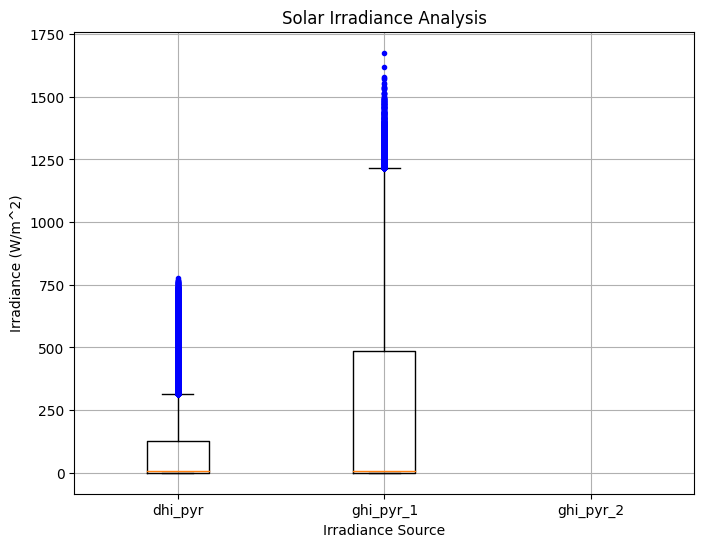

In [ ]:
irradiance_columns = ['dhi_pyr', 'ghi_pyr_1', 'ghi_pyr_2']
plt.figure(figsize=(8, 6))
plt.boxplot(rs[irradiance_columns], labels=irradiance_columns, sym='b.')
plt.xlabel('Irradiance Source')
plt.ylabel('Irradiance (W/m^2)')
plt.title('Solar Irradiance Analysis')
plt.grid(True)
plt.show()

In [ ]:
rs.columns

Index(['time', 'dhi_pyr', 'ghi_pyr_1', 'ghi_pyr_2', 'air_temperature',
       'relative_humidity', 'barometric_pressure', 'precipitation',
       'wind_speed', 'wind_from_direction', 'gti_clean', 'gti_soil',
       'gti_monthly', 'sensor_cleaning'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

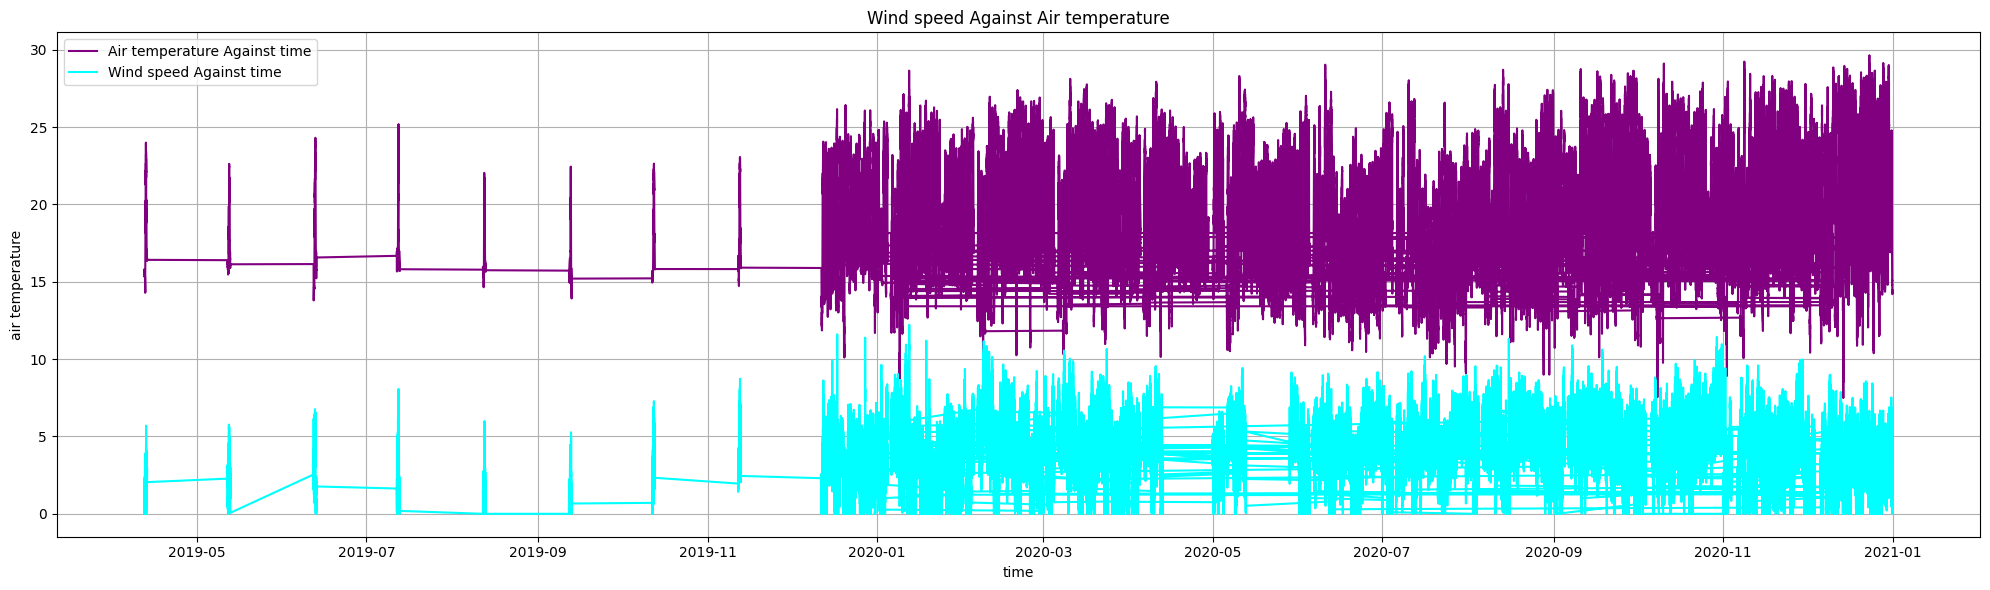

In [ ]:
#line plot
plt.figure(figsize=(20, 6))
plt.plot(rs['time'], rs['air_temperature'], label='Air temperature Against time', color='purple')
plt.plot(rs['time'], rs['wind_speed'], label='Wind speed Against time', color='cyan')
plt.xlabel('time')
plt.ylabel('wind speed')
plt.ylabel('air temperature')
plt.title('Wind speed Against Air temperature')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

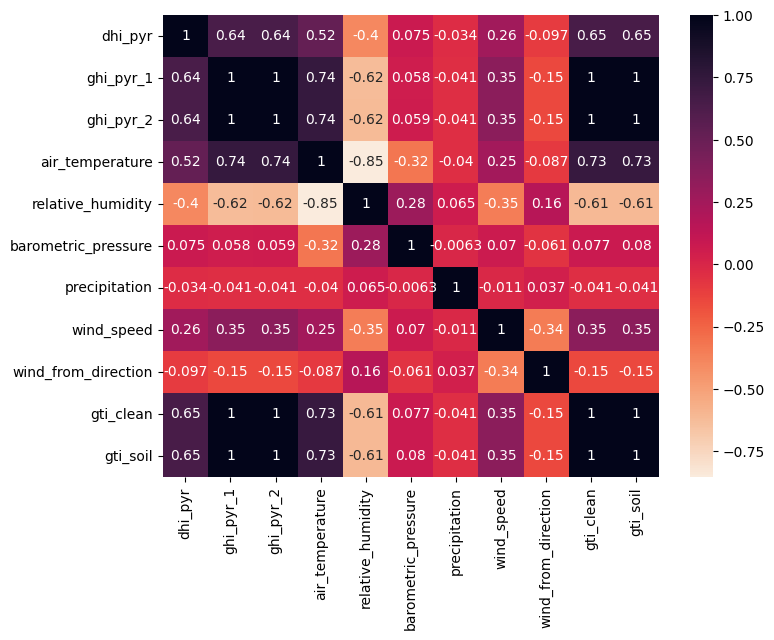

In [ ]:
#finding the correlation
rs_corr = rs[['dhi_pyr', 'ghi_pyr_1', 'ghi_pyr_2', 'air_temperature',
       'relative_humidity', 'barometric_pressure', 'precipitation',
       'wind_speed', 'wind_from_direction','gti_clean', 'gti_soil']].corr()
#plotting the heatmap
plt.figure(figsize =(8,6))
sns.heatmap(rs_corr, annot = True, cmap = "rocket_r")
plt.show()

## Feature Engineering

In [ ]:
rs['year']=rs['time'].dt.year
rs['month']=rs['time'].dt.month
rs['day']= rs['time'].dt.day
rs['hour']= rs['time'].dt.hour
rs.head()


,time,dhi_pyr,ghi_pyr_1,ghi_pyr_2,air_temperature,relative_humidity,barometric_pressure,precipitation,wind_speed,wind_from_direction,gti_clean,gti_soil,gti_monthly,sensor_cleaning,year,month,day,hour
0,2019-04-12 00:01:00,0.0,0.0,0.0,15.598166,97.782997,811.291992,0.0,1.251317,243.790543,0.0,0.0,0.0,0.0,2019,4,12,0
1,2019-04-12 00:02:00,0.0,0.0,0.0,15.573500,97.705002,811.211609,0.0,1.101517,243.470978,0.0,0.0,0.0,0.0,2019,4,12,0
2,2019-04-12 00:03:00,0.0,0.0,0.0,15.566666,97.707001,811.216919,0.0,0.602717,231.842773,0.0,0.0,0.0,0.0,2019,4,12,0
3,2019-04-12 00:04:00,0.0,0.0,0.0,15.556666,97.619003,811.210022,0.0,1.107400,252.289948,0.0,0.0,0.0,0.0,2019,4,12,0
4,2019-04-12 00:05:00,0.0,0.0,0.0,15.532499,97.594002,811.212647,0.0,0.540367,231.998215,0.0,0.0,0.0,0.0,2019,4,12,0


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_16, *['air_temperature'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_17, *['relative_humidity'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_18, *['barometric_pressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_19, *['wind_speed'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_20, *['air_temperature', 'relative_humidity'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_21, *['relative_humidity', 'barometric_pressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_22, *['barometric_pressure', 'wind_speed'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_23, *['wind_speed', 'wind_from_direction'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_24, *['time', 'air_temperature', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_25, *['time', 'relative_humidity', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_26, *['time', 'barometric_pressure', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_27, *['time', 'wind_speed', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_28, *['air_temperature'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_29, *['relative_humidity'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_30, *['barometric_pressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_31, *['wind_speed'], **{})
chart

In [ ]:
rs.tail()

,time,dhi_pyr,ghi_pyr_1,ghi_pyr_2,air_temperature,relative_humidity,barometric_pressure,precipitation,wind_speed,wind_from_direction,gti_clean,gti_soil,gti_monthly,sensor_cleaning,year,month,day,hour
567355,2020-12-31 23:56:00,0.0,0.0,0.0,14.398666,99.064003,812.351807,0.0,0.020783,218.768341,0.0,0.0,0.0,0.0,2020,12,31,23
567356,2020-12-31 23:57:00,0.0,0.0,0.0,14.421999,99.078003,812.374329,0.0,0.228617,218.766998,0.0,0.0,0.0,0.0,2020,12,31,23
567357,2020-12-31 23:58:00,0.0,0.0,0.0,14.436999,99.073998,812.387512,0.0,0.290967,218.765732,0.0,0.0,0.0,0.0,2020,12,31,23
567358,2020-12-31 23:59:00,0.0,0.0,0.0,14.438666,99.078003,812.386719,0.2,0.644283,218.766892,0.0,0.0,0.0,0.0,2020,12,31,23
567359,2021-01-01 00:00:00,0.0,0.0,0.0,14.443666,99.082001,812.393921,0.0,0.207833,218.767380,0.0,0.0,0.0,0.0,2021,1,1,0


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['air_temperature'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['relative_humidity'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['barometric_pressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['precipitation'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_4, *['air_temperature', 'relative_humidity'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_5, *['relative_humidity', 'barometric_pressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_6, *['barometric_pressure', 'precipitation'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_7, *['precipitation', 'wind_speed'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['time', 'relative_humidity', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['time', 'barometric_pressure', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['time', 'precipitation', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['time', 'wind_speed', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['air_temperature'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_13, *['relative_humidity'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_14, *['barometric_pressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_15, *['precipitation'], **{})
chart

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import pickle




In [ ]:
# Split the data into features (X) and target variables (y)
X = rs[['air_temperature', 'relative_humidity', 'barometric_pressure', 'wind_speed','precipitation','wind_from_direction','sensor_cleaning', 'day', 'hour', 'month']]
y = rs[['dhi_pyr', 'ghi_pyr_1', 'ghi_pyr_2','gti_clean', 'gti_soil']]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

In [ ]:
# Choose a linear regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test_poly)

In [ ]:
# Evaluate the model using MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Absolute Error (MAE): 93.95650800120646
Mean Squared Error (MSE): 18569.08452411583
R-squared (R^2): 0.7778148459305868


In [ ]:
#save the traine model to a .pkl file in your current directory
file_path = 'polynomial_regression_solar_irradiance_model.pkl'
with open(file_path,'wb')as file:
  joblib.dump((model, poly, scaler), file)